# 단순선형회귀 - 경사하강(Gradient Descent)

경사하강의 개념: 경사를 하강하면서 비용함수를 최소화 하는 파라미터(세타)의 값을 찾아내는 방법  
learning rate (얼마나 내려갈 것인지에 대한 비율)
비용함수가 수렴하지 않는 경우 learning rate(a)를 더 작게 설정하기  
비용함수의 수렴이 매우 느린경우 larning rate(a)를 더 크게 설정하기.   반복횟수(iteration)을 줄이기.  


경사를 강하하면서 비용함수 J세타를 최소화하는 파라미터(세타)의 값을 찾아내는 방법  
  
경사하강 알고리즘 - 단순선형회귀  
  
목표 = argmin J(세타0, 세타1)  
  
작동방법: 파라미터값 초기화, 비용함수의 값이 최소가 될 떄까지 파리미터 값을 지속적으로 업데이트

비용함수의 (파라미터)값이 변하지 않을때까지   
  
경사하강의 learning rate(a)에 따라서 작동하는 시간이 다름. a가 작다면 수렴과정이 느리고 너무 많으면 발산하게 됨. 그렇기에 learning rate의 a가 중요함. 적절한 값으로 들어가있다면 결국 알맞은 값을 찾게됨.

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt

In [30]:
# 데이터 생성

def generate_data(n_samples, bias, variance):       # variance 데이터의 폭(분산), bias 편향
    X = np.zeros(shape=(n_samples, 2)) #단순선형회귀(독립변수 1개)
    y = np.zeros(shape=n_samples)

    for i in range(n_samples):
        X[i][0] = 1 #x_0은 상수 1로 셋팅
        X[i][1] = i #x_1값은 1씩 증가시킴
        y[i] = (i+bias) + random.uniform(0, 1) * variance #y에 bias 생성        random.uniform(0, 1) 0과 1 사이의 랜덤 값   variance는 10
        
    return X, y

In [34]:
X, y = generate_data(100, 25, 10) #n_samples:100, bias:25, variance:10      

In [42]:
print(y)

[ 30.34689527  29.55869199  35.11326976  37.25937121  34.1303173
  32.32588783  33.9282483   36.76993568  41.19340799  40.6981879
  42.96878668  44.99630931  38.39675195  40.82717886  47.70052567
  40.19337398  45.89398564  49.89216813  45.45951608  49.98831911
  45.90575052  46.29193953  51.38882347  52.74510586  54.68447426
  50.16033401  58.82075145  58.02855736  57.57910828  58.85835532
  57.20983145  64.19040978  66.88790142  59.70412262  66.37781965
  68.25242501  62.73743659  65.92219883  71.94021886  73.47977783
  74.71409742  73.32912814  75.93247861  76.60031416  76.97191453
  77.90298377  77.92159356  75.23026867  78.10946475  76.11467536
  79.60753279  79.23198615  80.72461455  86.81942307  79.95135304
  85.79452676  86.78347197  82.13797767  88.06721155  87.67233292
  91.71479064  88.39333283  92.01319447  93.6047246   89.29855169
  94.38485224  93.42529405  97.32221563  98.0973177   99.85817481
  99.79782492 100.76261972 100.4517774  106.61009228 106.64357831
 100.7185176

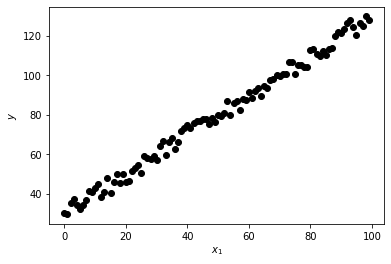

In [68]:
plt.plot(X[:,1], y, "ko") #x_1과 y의 상관관계 그래프
#plt.plot(X)
plt.xlabel('$x_1$') #x축
plt.ylabel('$y$')   #y축
plt.show()

여태까지 임의로 만든 데이터 셋

In [5]:
#경사하강
def gradient_descent(X, y, theta, alpha, m, n_iter):       # m 데이터 개수     # alpha learning rate   # n_iter  number of iterations # 얼마나 반복할 것인지 사용자가 지정함.
    # 값들을 저장하기 위해서 리스트로 먼저 호출
    theta_list = [] # 회귀계수(파라미터)
    cost_list = []  # 비용함수 값
    iter_list = []  # 반복하는 값 확인 
    check_points = int(n_iter/20)       # 체크포인트 n_iter가 250번 마다 한번씩 확인해보겠다 그냥 시각적으로 확인해보려고 넣은 부분.

    for i in range(n_iter):
        hypothesis = np.dot(X, theta) # 가설함수(X:mxn, theta:nx1, hypothesis:mx1)       # 우리의 예측값        hO(x) = 세타0 x0 + 세타1 x1 + ... 세타0 x0
        loss = hypothesis - y #error    예측값에서 떨어진 값 즉 오류(놓친 값들)
        cost = np.sum(loss ** 2) / (2 * m) # 비용함수: J(theta)     loss 안에 수식이 들어가있음. 이 코드 라인 자체가 수도코드에 관한걸 구현한거임 pdf 참고.
        gradient = np.dot(X.T, loss) / m # 편미분   차원 맞추기
        theta = theta - alpha * gradient #theta update(theta:nx1)       # 편미분 - 세타 업데이트 m 데이터 값(pdf 수식 보기)     
        
        if i % check_points == 0:   
            iter_list.append(i)
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list, iter_list

In [6]:
m, n = np.shape(X) #m: n_sample, n: n_features
n_iter = 5000  #number of iterations        # 사용자가 지정하는 값. (여러 값들 넣어보기)
alpha = 0.0005 # learning rate          # 값 변형해보기   
theta = np.ones(n) #parameter vector(nx1)       # 세타 파라미터값 초기화 여기서는 1을 넣음.

theta, theta_list, cost_list, iter_list = gradient_descent(X, y, theta, alpha, m, n_iter) # iter_list 몇 번 값까지 찍었나 시각적인 확인용

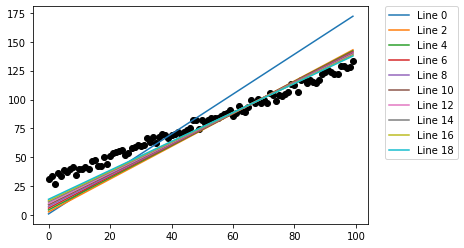

In [7]:
y_predict_step = np.dot(X, theta_list.T) #y_hat:100x20, X:100x2, theta:20x2     # 왜 20이냐? 5000번 아까 지정해줬던거를 250번씩 출력하니까 20번 출력됨
plt.plot(X[:,1], y, "ko")
for i in range (0,y_predict_step.shape[1],2): #range(0,20,2)
    plt.plot(X[:,1],y_predict_step[:,i], label='Line %d'%i)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

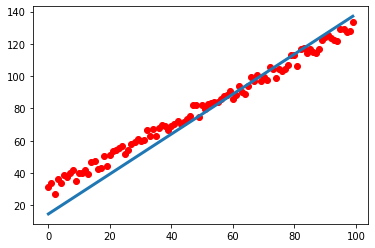

In [8]:
y_predict= np.dot(X, theta) #theta_hat     
plt.plot(X[:,1],y,"ro")
plt.plot(X[:,1],y_predict, lw=3)
plt.show()

In [9]:
theta

array([14.6844005 ,  1.23698666])

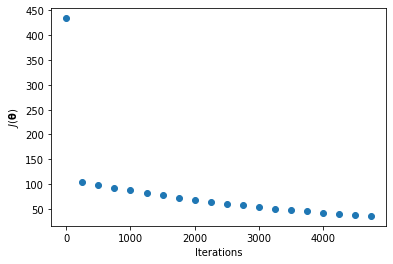

In [10]:
plt.scatter(iter_list[:50], cost_list[:50])
plt.xlabel('Iterations')
plt.ylabel(r'$J(\mathbf{\theta})$') 
plt.show()

bias(편향)  
학습 모델이 학습 데이터에 대해 만들어 낸 예측값과 실데값 간의 평균적 차이  
high bias 학습 데이터의 특성을 반영하지않고 모델을 지나치게 간순화함  
  
  분산(variance)  
  학습된 모델이 테스트 데이터에 대해 만들어 낸 예측값과 실제값 간 차이들에 대한 변동성  
    
  학습 데이터의 지역적 특성을 지나치게 반영하여 새로운 데이터에 대한 일반화의 어려움.    
    
  오버피팅이 된다는 소리는 분산이 높고 편향이 낮은 것. 즉 너무 딱딱 맞춰서 학습이 되어 있는 모습   
    
  좋은 모델의 조건은 Total error 를 최소화 하는 bias 와 variance 간의 군형을 찾아내는 것. 
  토탈에러 = 분산 + 편향제곱 + 데이터 자체에 있는 노이즈(에러)  
    
ppt 88 page 보면서 식 이해하기  

선형회귀에서 과대적합 해결방안.  
1. 더 많은 데이터 활용하기  
2. 피쳐(feature)의 개수 줄이기: 필요한 피쳐들만 찾아서 사용  
        occam's Rzor: 보다 적은 수의 논리로 설명이 가능한 경우 많은 수의 논리를 세우지 않는다.는 문제해결의 원리. 즉 기계학습에서는 필요이상의 너무 많은 피쳘르 사용하지 않는것.  
3. 적절한 매개변수 선정하기: 적절한 하이퍼파라미터 선정(ex: learning rate #iterations)  
  
정규화(regularization) 적용하기: 피쳐의 가중치 값을 적절히 줄일 수 있도록 비용함수에 규제 수식(penalty term) 추가   

        라쏘 회귀: L1 정규화  
        리지 회귀: L2 정규화  
        
리지회귀-L2 정규화  
어떤 파라미터값이 혼자 커질때 오버피팅되는 것을 방지하기 위한 수식.   
람다는 사람이 직접 값을 찾아내며 입력하는 하이퍼파라미터 값.  
  
  이전에 알고있던 수도코드에서 패널티가 생겨있다는 차이.  
    
리쏘 회귀=L1 정규화   
  
  
L1 정규화 L2 정규화 - 기하학적 의미  
  
  L1 정규화는 피쳐를 선택가능  
  중요하지 않은 피쳐는 알아서 없애줌. 
  
  L2 정규화는 모든 피쳐들의 중요도를 알수 있음 모든 피쳐들이 중요한 경우에 사용함.  
    
선형회귀에서 과대적합 해결방안.